## ALP Data Mining


---
Calvin Christian Tjong (0706022210009) <br>
Ricky Jonathan Harianto Tjahjono (0706022210005)


## Metadata
---
The Customer Shopping Trends dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels

Column Names:

1. Customer ID:               Unique identifier for each customer.
2. Age:                       Customer's age (in years).
3. Gender:                   Customer's gender (e.g., Male, Female).
4. Item Purchased:            Name of the item purchased by the customer.
5. Category:                  Product category (e.g., Clothing, Electronics).
6. Purchase Amount (USD):     Amount spent by the customer in USD.
7. Location:                  Customer’s state of residence.
8. Size:                      Size of the product (e.g., S, M, L).
9. Color:                     Color of the purchased item.
10. Season:                    Season during which the purchase occurred (e.g.,  Winter, Spring).
11. Review Rating:             Customer's product rating (scale of 1 to 5).
12. Subscription Status:       Whether the customer is subscribed to a service or membership (Yes/No).
13. Payment Method:            Payment method used (e.g., Credit Card, Bank Transfer).
14. Shipping Type:             Type of shipping chosen (e.g., Express, Free Shipping).
15. Discount Applied:          Whether a discount was applied to the purchase (Yes/No).
16. Promo Code Used:           Whether a promo code was used during the transaction (Yes/No).
17. Previous Purchases:        Number of previous purchases made by the customer.
18. Preferred Payment Method:  The customer’s preferred payment method.
19. Frequency of Purchases:    How often the customer makes purchases (e.g., Weekly, Fortnightly).



## Data Preparation

## Import Library

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/calvct/data-mining-w2/refs/heads/main/shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


# Exploratory Data Analysis

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Visualization

<ipython-input-385-a7f6de659744>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Purchase Amount (USD)", data=df, palette="Blues_d")


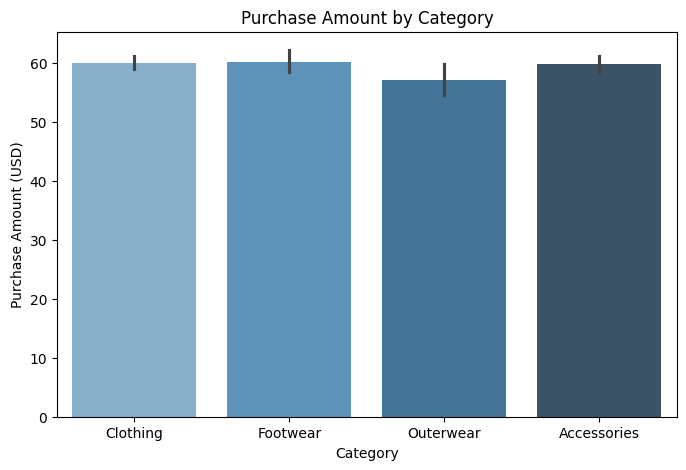

In [ ]:
# Bar chart: Purchase Amount by Category
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Purchase Amount (USD)", data=df, palette="Blues_d")
plt.title("Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.show()


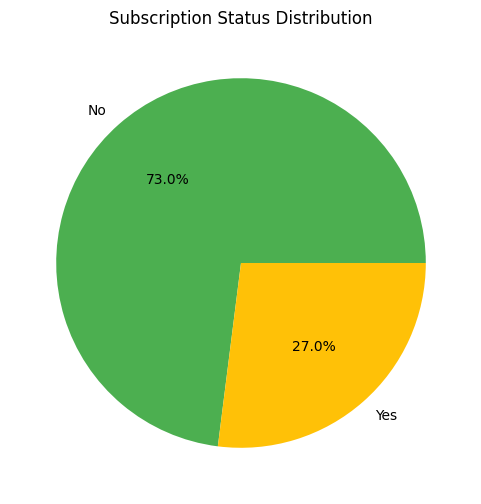

In [ ]:
# Pie chart: Distribution of Subscription Status
plt.figure(figsize=(6, 6))
df["Subscription Status"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#4CAF50", "#FFC107"])
plt.title("Subscription Status Distribution")
plt.ylabel("")
plt.show()

<ipython-input-387-1222820c8b7a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="pastel")


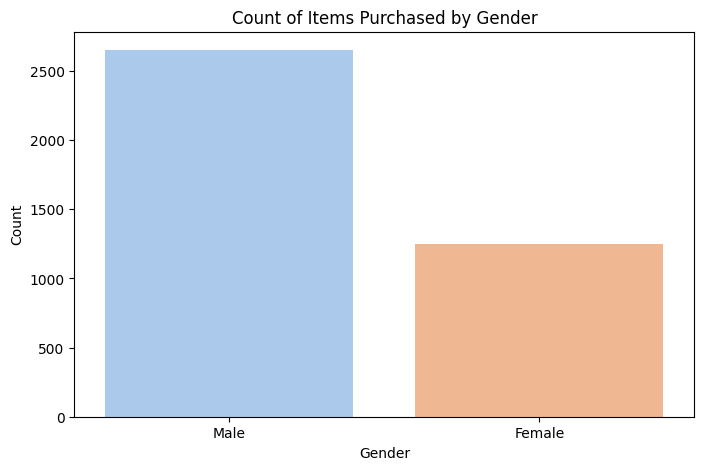

In [ ]:
# Count plot: Items Purchased by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Count of Items Purchased by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



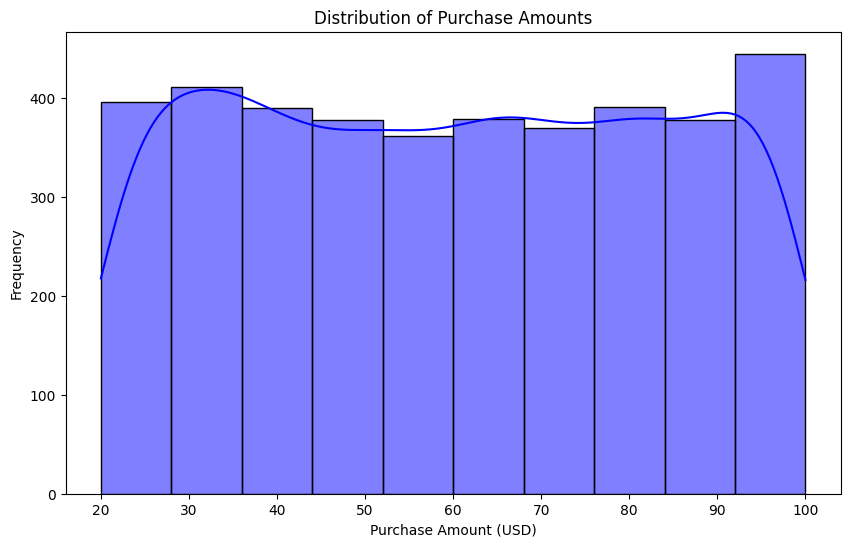

In [ ]:
# Distribution of Purchase Amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Purchase Amount (USD)'], bins=10, kde=True, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-389-cbeb7cefcbd6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')
<ipython-input-389-cbeb7cefcbd6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')


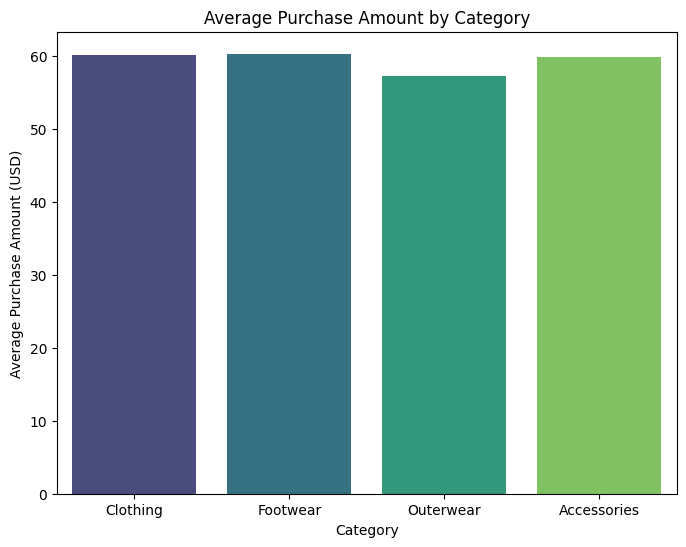

In [ ]:
# Average Purchase Amount by Category
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df, ci=None, palette='viridis')
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

<ipython-input-390-02c4a4c81089>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Status', data=df, palette='pastel')


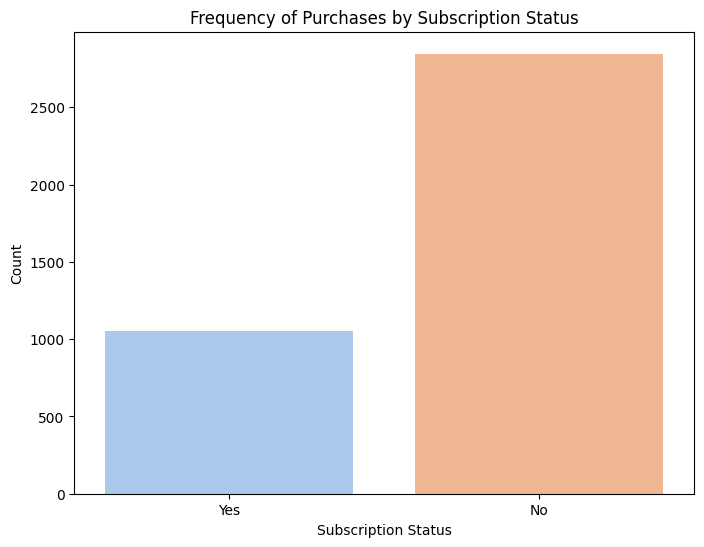

In [ ]:
# Frequency of Purchases by Subscription Status
plt.figure(figsize=(8,6))
sns.countplot(x='Subscription Status', data=df, palette='pastel')
plt.title('Frequency of Purchases by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()


## Classification

In [ ]:
df_classification = df.copy()
bins = [0, 2, 4, 5]
labels = ['Low', 'Medium', 'High']
df_classification['Review Rating'] = pd.cut(df_classification['Review Rating'], bins=bins, labels=labels)

# 2. Categorize Purchase Amount (USD) - adjusted based on the actual min and max
bins = [20, 40, 60, 80, 100]  # Adjusted ranges for Purchase Amount (USD)
labels = ['Low', 'Medium', 'High', 'Very High']
df_classification['Purchase Amount (USD)'] = pd.cut(
    df_classification['Purchase Amount (USD)'], bins=bins, labels=labels, right=False
)

# 3. Categorize Previous Purchases (unchanged)
bins = [0, 5, 15, 30, 50]
labels = ['Rarely Purchased', 'Occasionally Purchased', 'Frequent Purchaser', 'Very Frequent']
df_classification['Previous Purchases'] = pd.cut(
    df_classification['Previous Purchases'], bins=bins, labels=labels, right=False
)

columns_to_encode = [
    'Gender', 'Item Purchased', 'Category','Purchase Amount (USD)','Location', 'Size', 'Color', 'Season', 'Review Rating',
    'Subscription Status', 'Payment Method', 'Shipping Type',
    'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Previous Purchases',
    'Frequency of Purchases'
]


# Label encoding
label_encoders = {}
for col in columns_to_encode:
    le = LabelEncoder()
    df_classification[col] = le.fit_transform(df_classification[col])
    label_encoders[col] = le

df_classification = df_classification.drop(columns=['Customer ID'])
df_classification.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,1,2,1,2,16,0,7,3,1,1,2,1,1,1,1,5,3
1,19,1,23,1,0,18,0,12,3,1,1,0,1,1,1,2,1,3
2,50,1,11,1,0,20,2,12,1,1,1,1,2,1,1,0,2,6
3,21,1,14,2,3,38,1,12,1,1,1,4,3,1,1,3,4,6
4,45,1,2,1,2,36,1,21,1,1,1,1,2,1,1,3,4,0


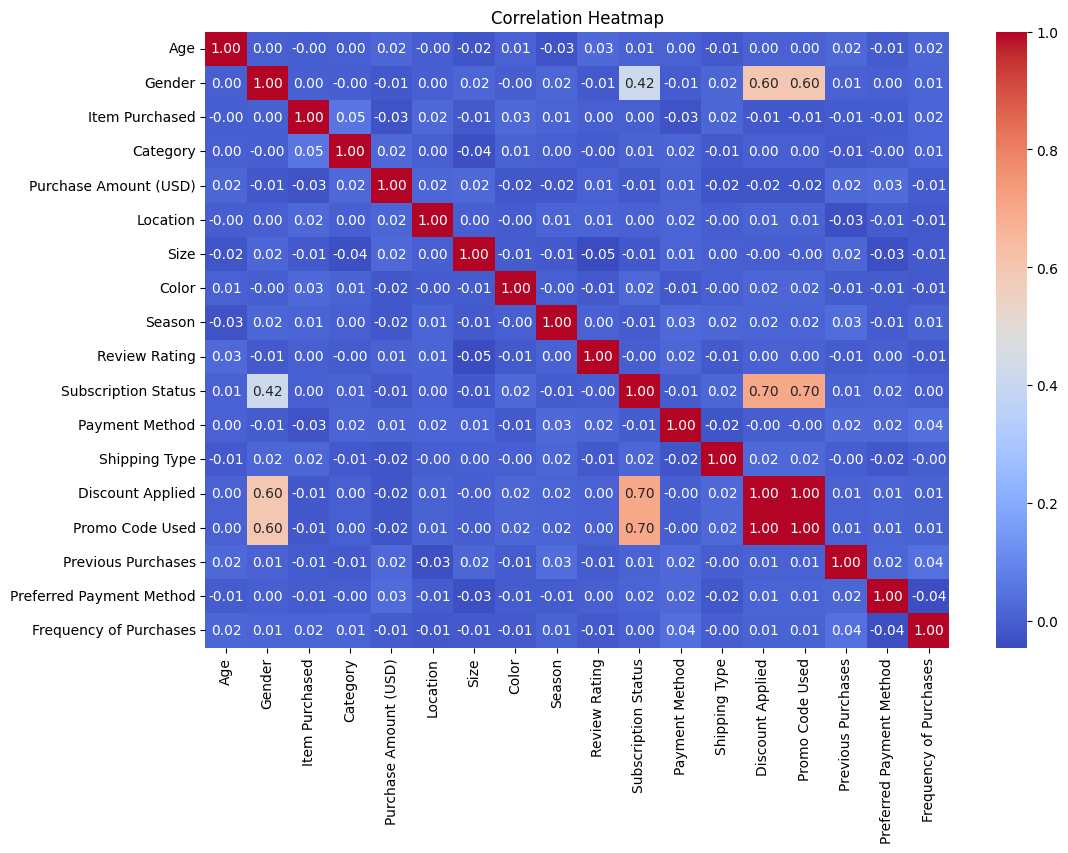

In [ ]:
correlation_matrix = df_classification.corr()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df_classification.drop(columns=['Subscription Status'])
y = df_classification['Subscription Status']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Menampilkan distribusi awal data
print("Distribusi kelas sebelum SMOTE:", Counter(y))

# Terapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menampilkan distribusi data setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))
df_classification_resampled = X_resampled.copy()
df_classification_resampled['Subscription Status'] = y_resampled


Distribusi kelas sebelum SMOTE: Counter({0: 2847, 1: 1053})
Distribusi kelas setelah SMOTE: Counter({1: 2847, 0: 2847})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:

#3
from sklearn.model_selection import train_test_split

# Misalnya, setelah melakukan SMOTE dan memiliki df_classification_resampled
X = df_classification_resampled.drop('Subscription Status', axis=1)  # Fitur
y = df_classification_resampled['Subscription Status']  # Target

# Memisahkan data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran X_train dan X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


# The shape method is used to check how many rows and columns are associated with each train or test data.

Shape of X_train: (3985, 17)
Shape of X_test: (1709, 17)


Desicion Tree

a. Defining the model using criterion Entropy and Gini Index

b. Predict the test set results

c. Check accuracy score

d. Check for overfitting and underfitting

e. Visualize decision trees

f. Confusion matrix

g. Classification report


h. Results and conclusion


In [ ]:
#Criterion Entropy
#a
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 42)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
#b
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.


In [ ]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred


Model accuracy score with criterion entropy: 0.8789


In [ ]:

#d
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.8789
Training accuracy: 0.8936


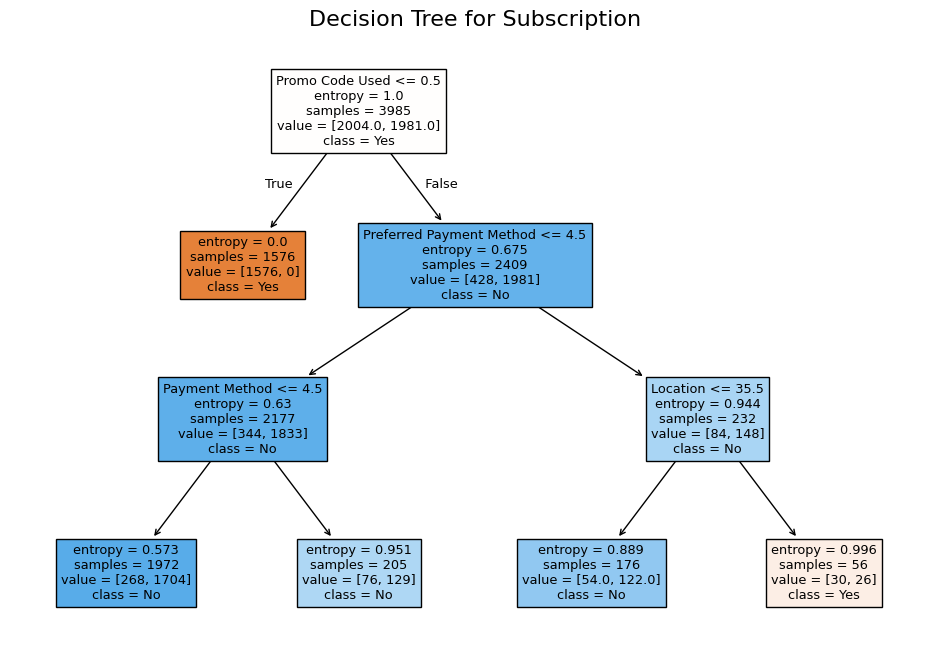

In [ ]:
#e
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['Yes','No'], filled=True)
plt.title('Decision Tree for Subscription', fontsize=16)
plt.show()

In [ ]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [ ]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred

Model accuracy score with criterion gini: 0.8789


In [ ]:
#d
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.8789
Training accuracy: 0.8936


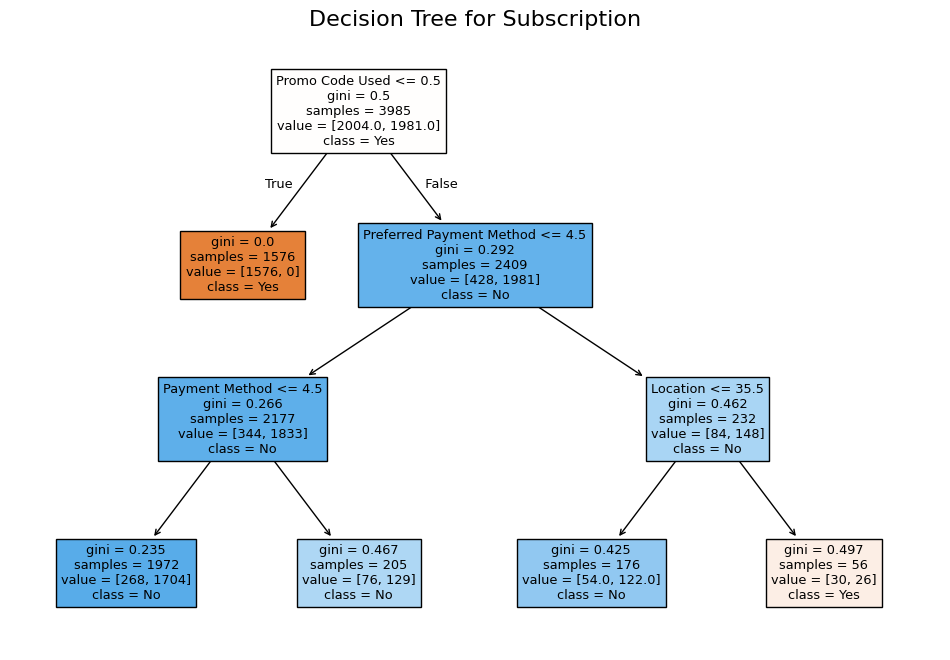

In [ ]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['Yes',"No"], filled=True)
plt.title('Decision Tree for Subscription', fontsize=16)
plt.show()


# Using matplotlib to create the decision tree of the Criterion Gini algorithm.


In [ ]:
#f
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[653 190]
 [ 17 849]]
Confusion Matrix Gini Index:
 [[653 190]
 [ 17 849]]


In [ ]:
#g
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)

# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       843
           1       0.82      0.98      0.89       866

    accuracy                           0.88      1709
   macro avg       0.90      0.88      0.88      1709
weighted avg       0.89      0.88      0.88      1709

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       843
           1       0.82      0.98      0.89       866

    accuracy                           0.88      1709
   macro avg       0.90      0.88      0.88      1709
weighted avg       0.89      0.88      0.88      1709



Naive Bayes

a. Defining the model

b. Predict the test set results

c. Check accuracy score

d. Confusion matrix

e. Classification report

f. Results and conclusion


In [ ]:

#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [ ]:
#b
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [ ]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

# Printing both accuracy score and confusion matrix of the Naive Bayes Classifier model

Model accuracy score: 0.8853
Confusion Matrix:
 [[647 196]
 [  0 866]]


In [ ]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Classification report of the Naive Bayes Classifier, showing the precision, recall, f1-score, and support values of the model.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       843
           1       0.82      1.00      0.90       866

    accuracy                           0.89      1709
   macro avg       0.91      0.88      0.88      1709
weighted avg       0.91      0.89      0.88      1709



Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
print(f'Confusion Matrix:\n{conf_matrix}')



Accuracy: 0.8800468110005851
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       843
           1       0.82      0.98      0.89       866

    accuracy                           0.88      1709
   macro avg       0.90      0.88      0.88      1709
weighted avg       0.90      0.88      0.88      1709

Confusion Matrix:
[[656 187]
 [ 18 848]]



## Clustering

In [ ]:
df_clustering = df.drop(['Customer ID', 'Size', 'Color', 'Shipping Type', 'Item Purchased', 'Promo Code Used', 'Discount Applied', 'Preferred Payment Method'], axis=1)
df_clustering.head()

# membuat 1 dataframe untuk clustering

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,55,Male,Clothing,53,Kentucky,Winter,3.1,Yes,Credit Card,14,Fortnightly
1,19,Male,Clothing,64,Maine,Winter,3.1,Yes,Bank Transfer,2,Fortnightly
2,50,Male,Clothing,73,Massachusetts,Spring,3.1,Yes,Cash,23,Weekly
3,21,Male,Footwear,90,Rhode Island,Spring,3.5,Yes,PayPal,49,Weekly
4,45,Male,Clothing,49,Oregon,Spring,2.7,Yes,Cash,31,Annually


In [ ]:
cols = ['Gender', 'Category', 'Location', 'Season', 'Subscription Status', 'Payment Method', 'Frequency of Purchases']
label_encoders = {}
for col in cols:
    encoder = LabelEncoder()
    df_clustering[col] = encoder.fit_transform(df_clustering[col])
    label_encoders[col] = encoder
df_clustering.head()

# melakukan encoding terhadap kolom-kolom yang bersifat categorical sehingga menjadi continuous

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,55,1,1,53,16,3,3.1,1,2,14,3
1,19,1,1,64,18,3,3.1,1,0,2,3
2,50,1,1,73,20,1,3.1,1,1,23,6
3,21,1,2,90,38,1,3.5,1,4,49,6
4,45,1,1,49,36,1,2.7,1,1,31,0


In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)
scaled_df.head()

# data-data di scaling sehingga valuenya tidak terlalu berbeda jauh

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases
0,0.718913,0.685994,-0.002002,-0.285629,-0.576399,1.349198,-0.907584,1.644294,-0.295206,-0.785831,0.012575
1,-1.648629,0.685994,-0.002002,0.178852,-0.436944,1.349198,-0.907584,1.644294,-1.472409,-1.616552,0.012575
2,0.390088,0.685994,-0.002002,0.558882,-0.297488,-0.441163,-0.907584,1.644294,-0.883807,-0.162789,1.513849
3,-1.517099,0.685994,1.113356,1.276716,0.957614,-0.441163,-0.349027,1.644294,0.881996,1.637107,1.513849
4,0.061263,0.685994,-0.002002,-0.454531,0.818159,-0.441163,-1.466141,1.644294,-0.883807,0.391025,-1.488699


## K-Means Clustering

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='random',max_iter=300)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
# melakukan K-Means Clustering dengan random state 42

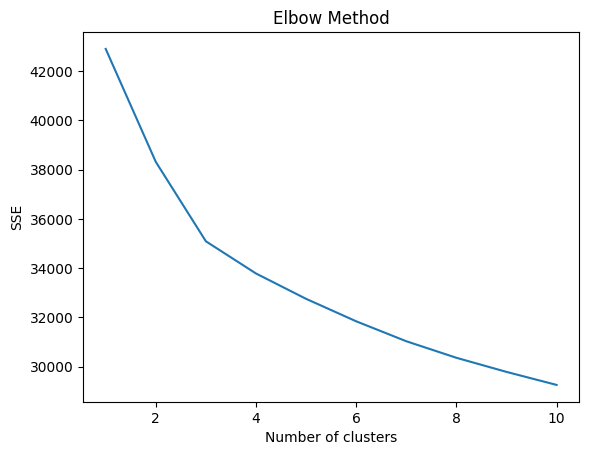

In [ ]:
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
# menampilkan grafik untuk menentukan elbow

In [ ]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)
# memilih nilai k dari elbow untuk digunakan sebagai berapa jumlah cluster yang akan dibuat

The best k for your model is: 3


In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)
# melakukan K-Means clustering dengan jumlah cluster adalah 3

In [ ]:
# Inverse transform the scaled data to get the original values
inversed_df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=scaled_df.columns)
inversed_df['KMeans'] = kmeans.labels_
inversed_df.head()
# mengembalikan value yang tadi discale menjadi value awalnya

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases,KMeans
0,55.0,1.0,1.0,53.0,16.0,3.0,3.1,1.0,2.0,14.0,3.0,2
1,19.0,1.0,1.0,64.0,18.0,3.0,3.1,1.0,0.0,2.0,3.0,2
2,50.0,1.0,1.0,73.0,20.0,1.0,3.1,1.0,1.0,23.0,6.0,2
3,21.0,1.0,2.0,90.0,38.0,1.0,3.5,1.0,4.0,49.0,6.0,2
4,45.0,1.0,1.0,49.0,36.0,1.0,2.7,1.0,1.0,31.0,0.0,2


In [ ]:
for col in cols:
  inversed_df[col] = label_encoders[col].inverse_transform(inversed_df[col].astype(int))

inversed_df.head()
# mengubah value yang diencode menjadi value aslinya

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases,KMeans
0,55.0,Male,Clothing,53.0,Kentucky,Winter,3.1,Yes,Credit Card,14.0,Fortnightly,2
1,19.0,Male,Clothing,64.0,Maine,Winter,3.1,Yes,Bank Transfer,2.0,Fortnightly,2
2,50.0,Male,Clothing,73.0,Massachusetts,Spring,3.1,Yes,Cash,23.0,Weekly,2
3,21.0,Male,Footwear,90.0,Rhode Island,Spring,3.5,Yes,PayPal,49.0,Weekly,2
4,45.0,Male,Clothing,49.0,Oregon,Spring,2.7,Yes,Cash,31.0,Annually,2


In [ ]:
# aggregation
cluster_summary = inversed_df.groupby(y_pred).agg({
    'Age': ['mean', 'min', 'max'],
    'Gender': [pd.Series.mode],
    'Category': [pd.Series.mode],
    'Purchase Amount (USD)': ['mean', 'min', 'max'],
    'Location': [pd.Series.mode],
    'Season': [pd.Series.mode],
    'Review Rating': ['mean', 'min', 'max'],
    'Subscription Status': [pd.Series.mode],
    'Payment Method': [pd.Series.mode],
    'Frequency of Purchases': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

# Tambahkan label "Cluster " di depan setiap kolom
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")
# Tampilkan hasil
cluster_summary_transposed

# menampilkan cluster yang telah terbentuk

KMeans                         Cluster 0                     Cluster 1  \
Age                    mean    44.007212                     44.009381   
                       min          18.0                          18.0   
                       max          70.0                          70.0   
Gender                 mode       Female                          Male   
Category               mode     Clothing                      Clothing   
Purchase Amount (USD)  mean    60.249199                     59.565353   
                       min          20.0                          20.0   
                       max         100.0                         100.0   
Location               mode      Montana  [Indiana, New York, Vermont]   
Season                 mode         Fall                        Spring   
Review Rating          mean     3.741426                      3.761538   
                       min           2.5                           2.5   
                       max           5.0                           5.0   
Subscription Status    mode           No                            No   
Payment Method         mode  Credit Card                   Credit Card   
Frequency of Purchases mode    Bi-Weekly                     Quarterly   

KMeans                         Cluster 2  
Age                    mean    44.230769  
                       min          18.0  
                       max          70.0  
Gender                 mode         Male  
Category               mode     Clothing  
Purchase Amount (USD)  mean    59.491928  
                       min          20.0  
                       max         100.0  
Location               mode       Nevada  
Season                 mode       Spring  
Review Rating          mean      3.74245  
                       min           2.5  
                       max           5.0  
Subscription Status    mode          Yes  
Payment Method         mode  Credit Card  
Frequency of Purchases mode     Annually

In [ ]:
inversed_df['KMeans'].value_counts().sort_index()
# menampilkan jumlah data yang ada pada tiap cluster

,count
KMeans,
0,1248
1,1599
2,1053


# K-Means Clustering Conclusion

**Cluster 0**: Pelanggan adalah perempuan berusia rata-rata 44 tahun yang membeli pakaian di musim gugur dengan frekuensi bi-weekly, menggunakan kartu kredit, dan tidak berlangganan, dengan rata-rata ulasan 3.74.

**Cluster 1**: Pelanggan adalah laki-laki berusia rata-rata 44 tahun yang membeli pakaian di musim semi dengan frekuensi quarterly, menggunakan kartu kredit, dan tidak berlangganan, dengan rata-rata ulasan 3.76.

**Cluster 2**: Pelanggan adalah laki-laki berusia rata-rata 44 tahun yang membeli pakaian di musim semi dengan frekuensi tahunan, menggunakan kartu kredit, dan berlangganan, dengan rata-rata ulasan 3.74.








## Agglomerative

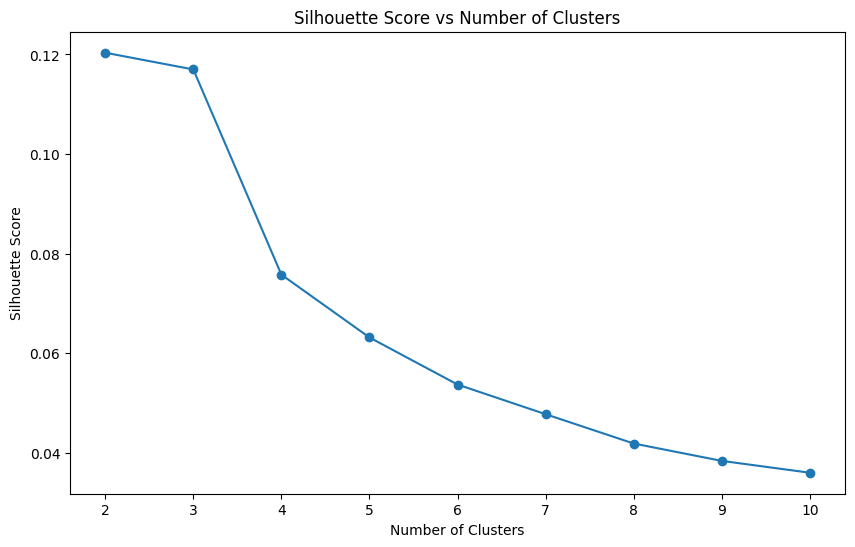

In [ ]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
# menampilkan grafik silhouette score

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_df)
# melakukan agglomerative clustering dengan metode euclidean dan ward linkage dengan jumlah cluster 2

In [ ]:
inversed_df['Agglo'] = y_hc
inversed_df.head()
# memasukkan hasil agglomerative clustering ke dalam inversed_df

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Payment Method,Previous Purchases,Frequency of Purchases,KMeans,Agglo
0,55.0,Male,Clothing,53.0,Kentucky,Winter,3.1,Yes,Credit Card,14.0,Fortnightly,2,1
1,19.0,Male,Clothing,64.0,Maine,Winter,3.1,Yes,Bank Transfer,2.0,Fortnightly,2,1
2,50.0,Male,Clothing,73.0,Massachusetts,Spring,3.1,Yes,Cash,23.0,Weekly,2,1
3,21.0,Male,Footwear,90.0,Rhode Island,Spring,3.5,Yes,PayPal,49.0,Weekly,2,1
4,45.0,Male,Clothing,49.0,Oregon,Spring,2.7,Yes,Cash,31.0,Annually,2,1


In [ ]:
# aggregation
cluster_summary = inversed_df.groupby(y_hc).agg({
    'Age': ['mean', 'min', 'max'],
    'Gender': [pd.Series.mode],
    'Category': [pd.Series.mode],
    'Purchase Amount (USD)': ['mean', 'min', 'max'],
    'Location': [pd.Series.mode],
    'Season': [pd.Series.mode],
    'Review Rating': ['mean', 'min', 'max'],
    'Subscription Status': [pd.Series.mode],
    'Payment Method': [pd.Series.mode],
    'Frequency of Purchases': [pd.Series.mode]
})

cluster_summary = cluster_summary.rename_axis("Agglo")

cluster_summary_transposed = cluster_summary.T

# Tambahkan label "Cluster " di depan setiap kolom
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="Agglo")
# Tampilkan hasil
cluster_summary_transposed

Agglo                             Cluster 0    Cluster 1
Age                    mean       43.995081    44.266603
                       min             18.0         18.0
                       max             70.0         70.0
Gender                 mode            Male         Male
Category               mode        Clothing     Clothing
Purchase Amount (USD)  mean       59.836261    59.570209
                       min             20.0         20.0
                       max            100.0        100.0
Location               mode           Idaho       Nevada
Season                 mode          Spring       Spring
Review Rating          mean        3.751827     3.744877
                       min              2.5          2.5
                       max              5.0          5.0
Subscription Status    mode              No          Yes
Payment Method         mode     Credit Card  Credit Card
Frequency of Purchases mode  Every 3 Months     Annually

# Agglomerative Clustering Conclusion

**Cluster 0**: Pelanggan adalah laki-laki berusia rata-rata 44 tahun yang membeli pakaian di musim semi dengan frekuensi setiap 3 bulan, menggunakan kartu kredit, tidak berlangganan, dan memberikan rata-rata ulasan 3.75.

**Cluster 1**: Pelanggan adalah laki-laki berusia rata-rata 44 tahun yang membeli pakaian di musim semi dengan frekuensi tahunan, menggunakan kartu kredit, berlangganan, dan memberikan rata-rata ulasan 3.74.

# Dendogram

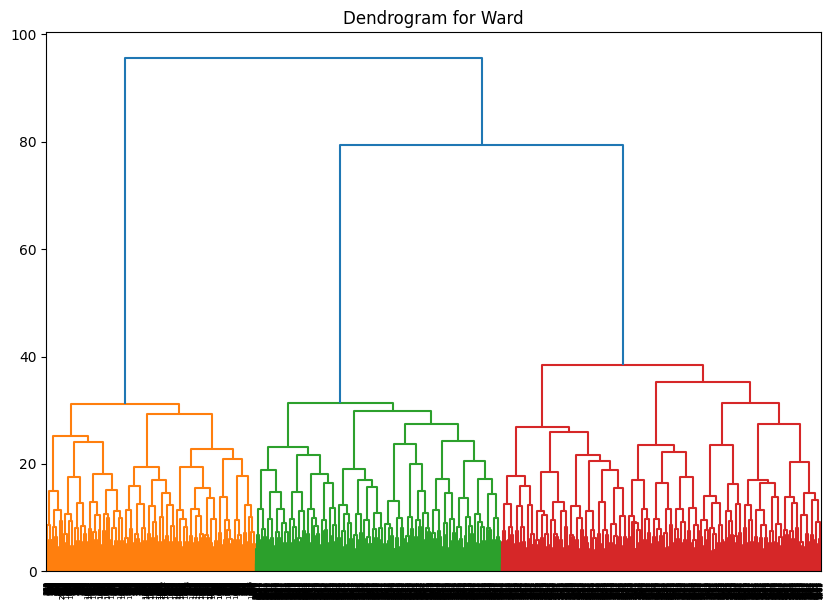

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Ward")
dend = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.show()

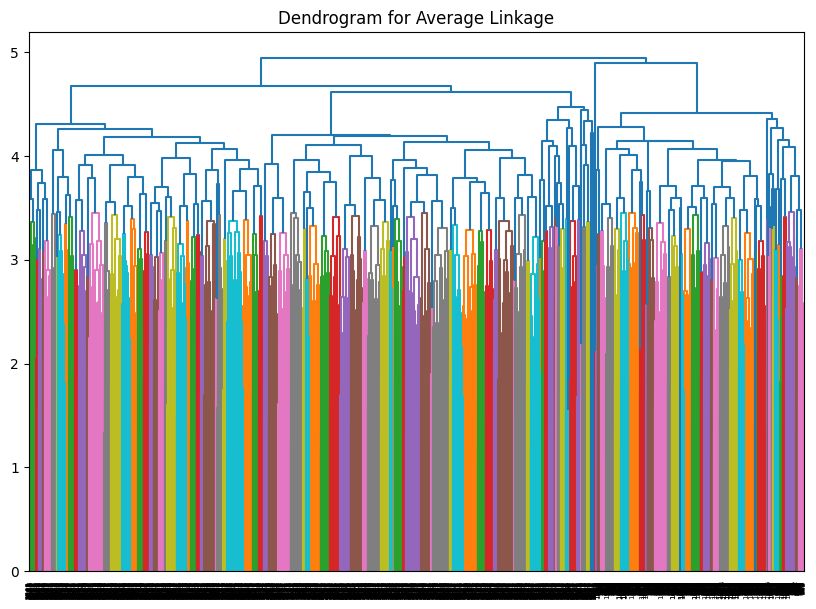

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Average Linkage")
dend = sch.dendrogram(sch.linkage(scaled_df, method='average'))
plt.show()

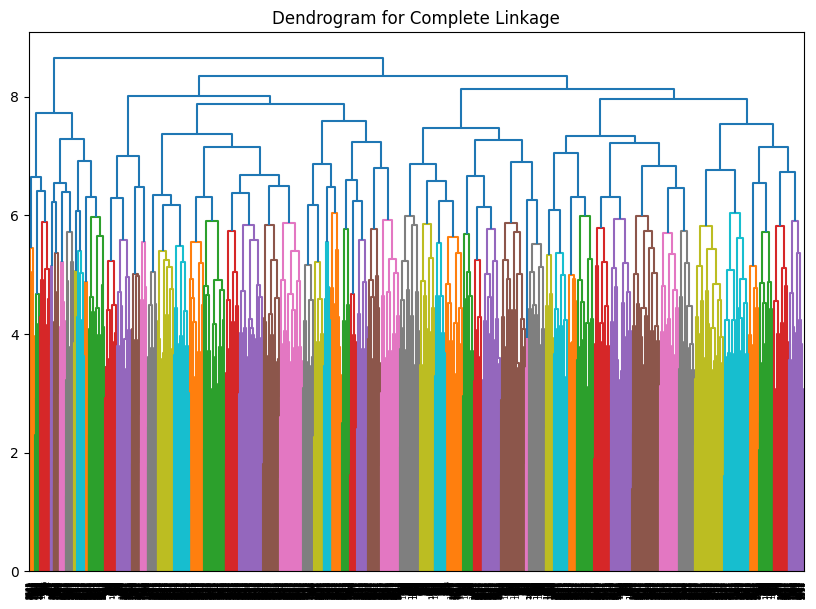

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Complete Linkage")
dend = sch.dendrogram(sch.linkage(scaled_df, method='complete'))
plt.show()

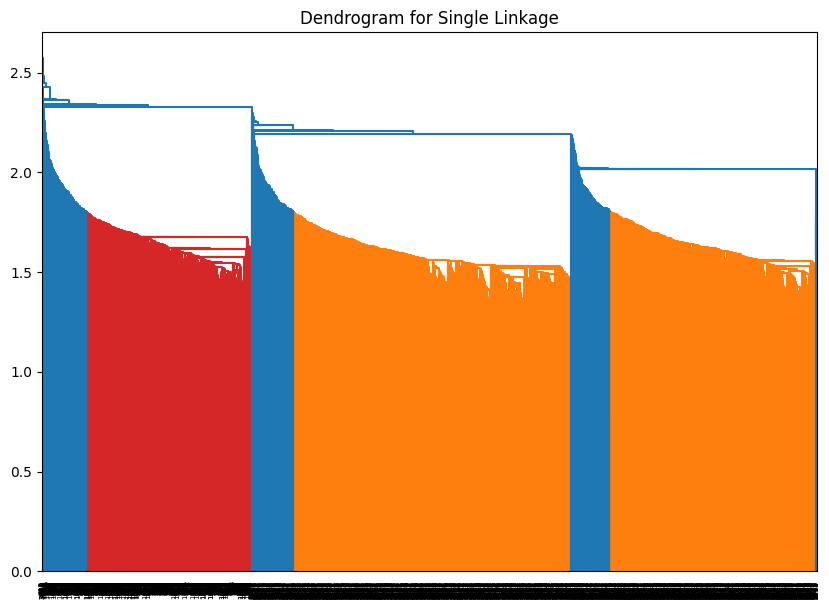

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(scaled_df, method='single'))
plt.show()